# Severity Classification For Us Accidents From 2016-2021
  - PreProccess
  - EDA 
  - MLP RandomForest GradiantBoosting LR 
  -
                + made by Sooroush Riazi

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error

## Reading Data
####    Data info
####    Data Describe

In [2]:
data = pd.read_csv('US_Accidents.csv')
data['Precipitation(in)']

0          0.00
1          0.02
2          0.02
3           NaN
4          0.01
           ... 
2845337    0.00
2845338    0.00
2845339    0.00
2845340    0.00
2845341    0.00
Name: Precipitation(in), Length: 2845342, dtype: float64

In [3]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

## Pre_Processing
 - #### Finding Categorical Collomns
 - #### Finding Missing Values and Fix them
 - #### Finding Categorical Collomns and encoding them
- #### Fixing Time Formats


- Finding Missing Values and Fix them

In [5]:
missing_percentages = data.isna().sum().sort_values(ascending=False)/len(data)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

- Filling Missing Value and Droping UseLess Features

In [6]:
data = data.drop(['Number','Wind_Chill(F)','ID','Description'], axis=1)
data['Precipitation_NA'] = 0
data.loc[data['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
data['Precipitation(in)'] = data['Precipitation(in)'].fillna(data['Precipitation(in)'].median())



data['City'] = data['City'].fillna(method='ffill')
data['Weather_Condition'] = data['Weather_Condition'].fillna(method='ffill')
data['Wind_Direction'] = data['Wind_Direction'].fillna(method='ffill')
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].fillna(method='ffill')
data['Visibility(mi)'] = data['Visibility(mi)'].fillna(method='ffill')
data['Pressure(in)']=data['Pressure(in)'].fillna(method='ffill')
data['Humidity(%)']=data['Humidity(%)'].fillna(method='ffill')
data = data[(data['Side'] == 'R') | (data['Side'] == 'L')]


In [7]:
data.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.00,0
1,0.02,0
2,0.02,0
3,0.00,1
4,0.01,0
5,0.00,1


In [8]:
missing = pd.DataFrame(data.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / data.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
8,Street,0.000035
13,Zipcode,0.046321
15,Timezone,0.128561
16,Airport_Code,0.335566
17,Weather_Timestamp,1.783090
18,Temperature(F),2.434612
39,Sunrise_Sunset,0.100761
40,Civil_Twilight,0.100761
41,Nautical_Twilight,0.100761
42,Astronomical_Twilight,0.100761


In [9]:
data=data.dropna(subset=list(missing.loc[missing['Missing_Percent(%)']>0,:].Feature))
missing = pd.DataFrame(data.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / data.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)


- Finding Categorical Collomns and encoding them

- Fixing Time Formats

In [10]:
data['Start_Time'] = data['Start_Time'].astype('datetime64')
data['End_Time'] = data['End_Time'].astype('datetime64')

data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month
data['Day'] = data['Start_Time'].dt.day
data['Hour'] = data['Start_Time'].dt.hour

data['DayofWeek'] = data['Start_Time'].dt.dayofweek   
dayofweek_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['DayofWeek'] = data['DayofWeek'].map(dayofweek_dict)

data['Time_Diff'] = (data['End_Time'] - data['Start_Time']).astype('timedelta64[m]')

data = data.drop(['Start_Time','End_Time'], axis=1)

- remove_outliers

In [11]:
cols=['Time_Diff','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)']
for col in cols:
    c = data.shape[0]
    cutoff = data[col].std()*3
    lower_limit = data[col].mean() - cutoff
    upper_limit = data[col].mean() + cutoff
    n = data.shape[0]
    data=data[(data[col] > lower_limit) & (data[col] < upper_limit)]
    print("{} new outliers detected for {} and removed".format(c-n,col))

0 new outliers detected for Time_Diff and removed
0 new outliers detected for Temperature(F) and removed
0 new outliers detected for Humidity(%) and removed
0 new outliers detected for Pressure(in) and removed
0 new outliers detected for Visibility(mi) and removed


- Fixing Wind Direction Feature

In [12]:
data.loc[data['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
data.loc[(data['Wind_Direction']=='West')|(data['Wind_Direction']=='WSW')|(data['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
data.loc[(data['Wind_Direction']=='South')|(data['Wind_Direction']=='SSW')|(data['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
data.loc[(data['Wind_Direction']=='North')|(data['Wind_Direction']=='NNW')|(data['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
data.loc[(data['Wind_Direction']=='East')|(data['Wind_Direction']=='ESE')|(data['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
data.loc[data['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", data['Wind_Direction'].unique())

Wind Direction after simplification:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' 'VAR' 'NE']


In [13]:
data['Wind_Direction'].value_counts()

CALM    471919
W       455862
S       442828
N       335271
E       323891
NW      130975
SW      122749
VAR     119608
SE      101792
NE       82995
Name: Wind_Direction, dtype: int64

In [14]:
data['Clear'] = np.where(data['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
data['Cloud'] = np.where(data['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
data['Rain'] = np.where(data['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
data['Heavy_Rain'] = np.where(data['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
data['Snow'] = np.where(data['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
data['Heavy_Snow'] = np.where(data['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
data['Fog'] = np.where(data['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [15]:
# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    data.loc[data['Weather_Condition'].isnull(),i] = data.loc[data['Weather_Condition'].isnull(),'Weather_Condition']
    data[i] = data[i].astype('bool')

data.loc[:,['Weather_Condition'] + weather]

,Weather_Condition,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
0,Light Rain,False,False,True,False,False,False,False
1,Light Rain,False,False,True,False,False,False,False
2,Overcast,False,True,False,False,False,False,False
3,Overcast,False,True,False,False,False,False,False
4,Light Rain,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
2845337,Fair,False,False,False,False,False,False,False
2845338,Fair,False,False,False,False,False,False,False
2845339,Partly Cloudy,False,True,False,False,False,False,False
2845340,Fair,False,False,False,False,False,False,False


## EDA & Visualization

In [16]:
#create a filter for high severity 3 or 4
high_severity_data = data[(data['Severity']==3) | (data['Severity']==4) ]

Text(0.5, 1.0, 'Pie Chart of Accident Severity')

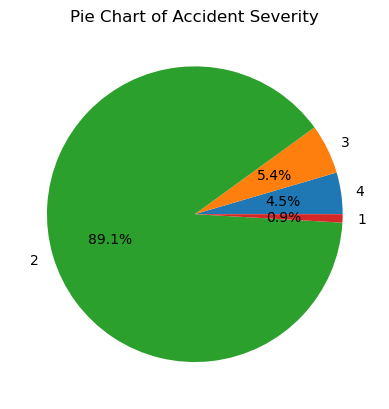

In [17]:
plt.pie([(data.Severity==4).sum(),(data.Severity==3).sum(),(data.Severity==2).sum(),(data.Severity==1).sum()],labels=[4,3,2,1],autopct="%.1f%%")
plt.title("Pie Chart of Accident Severity")

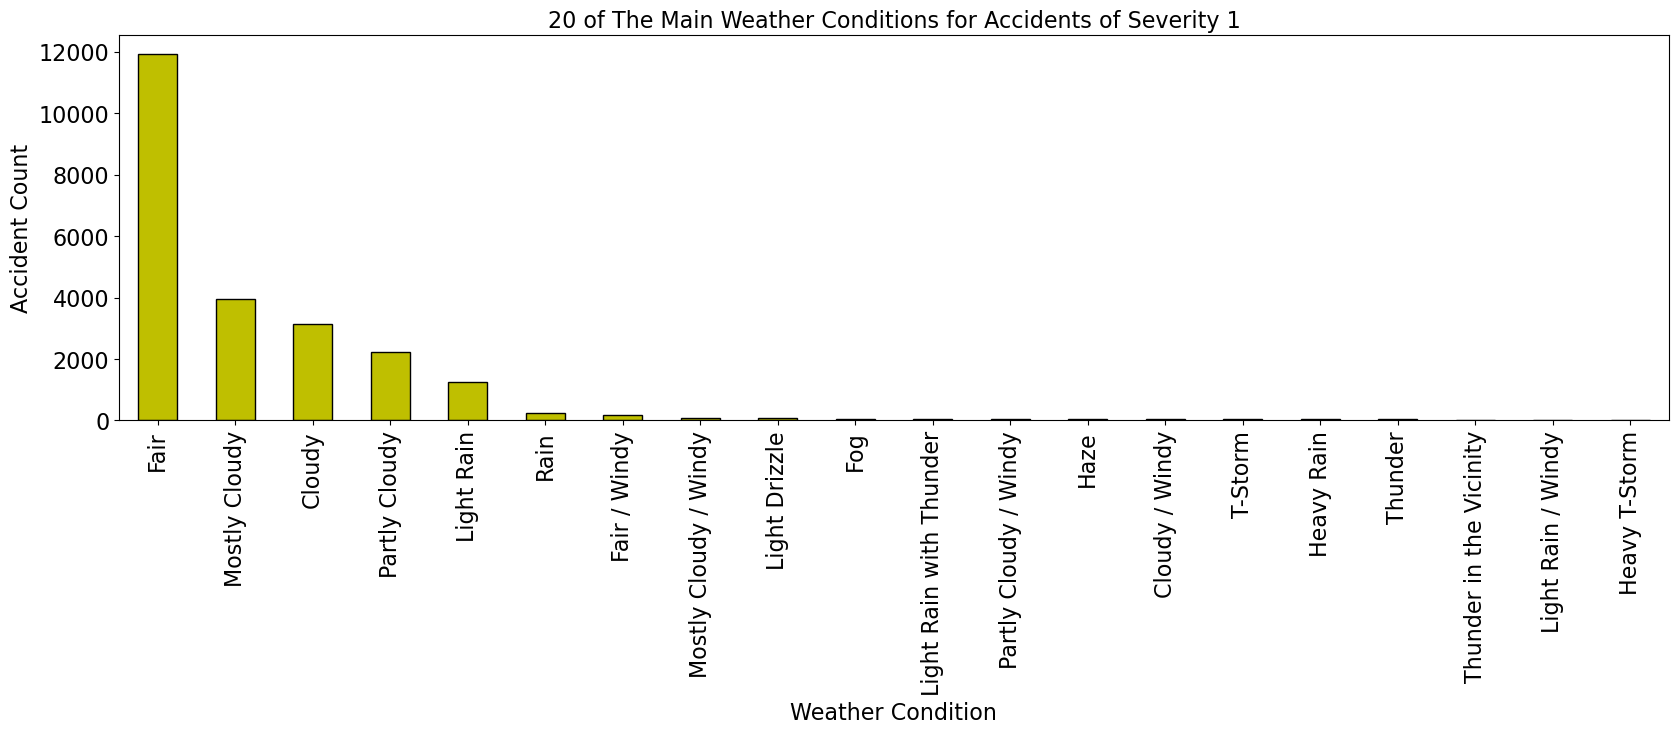

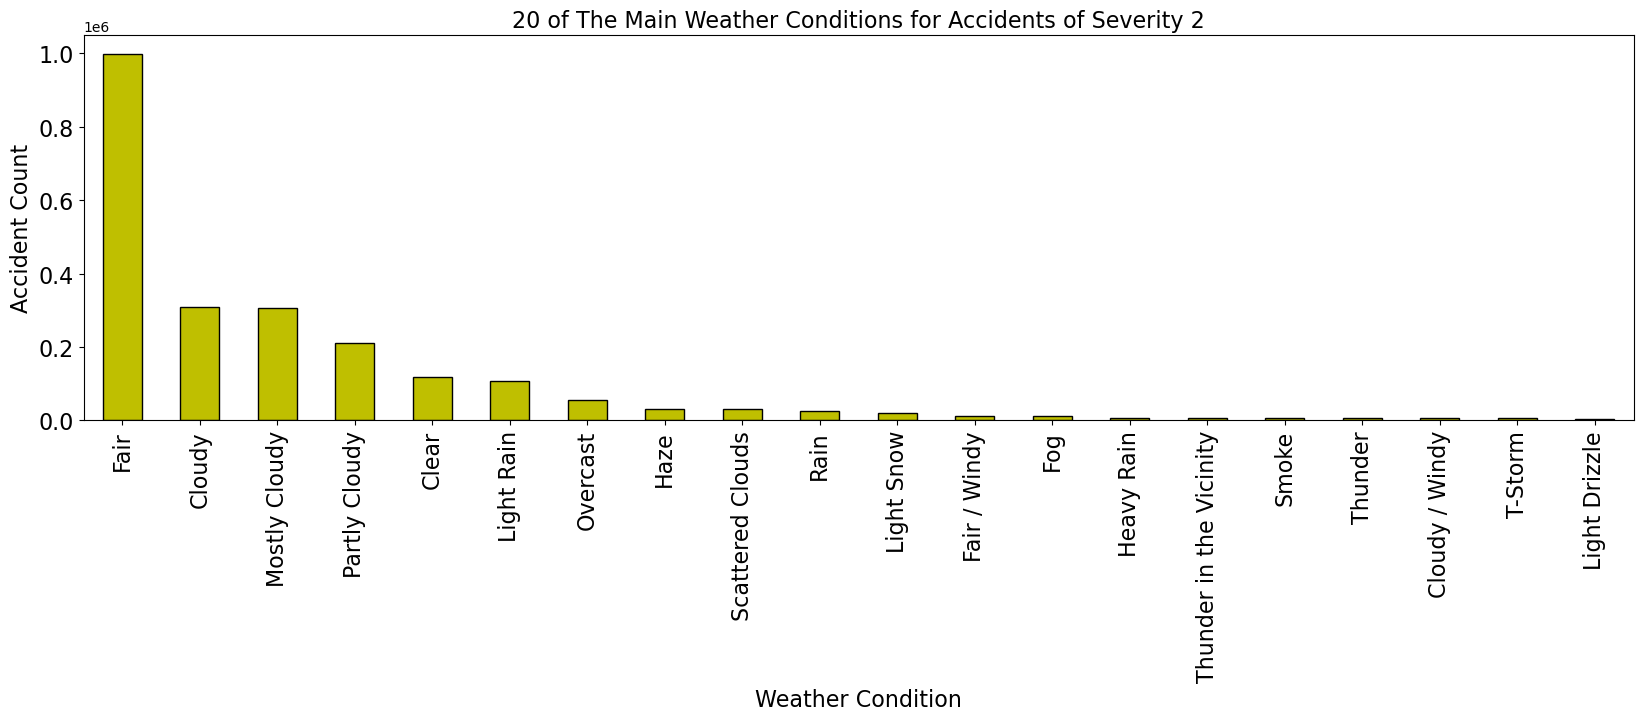

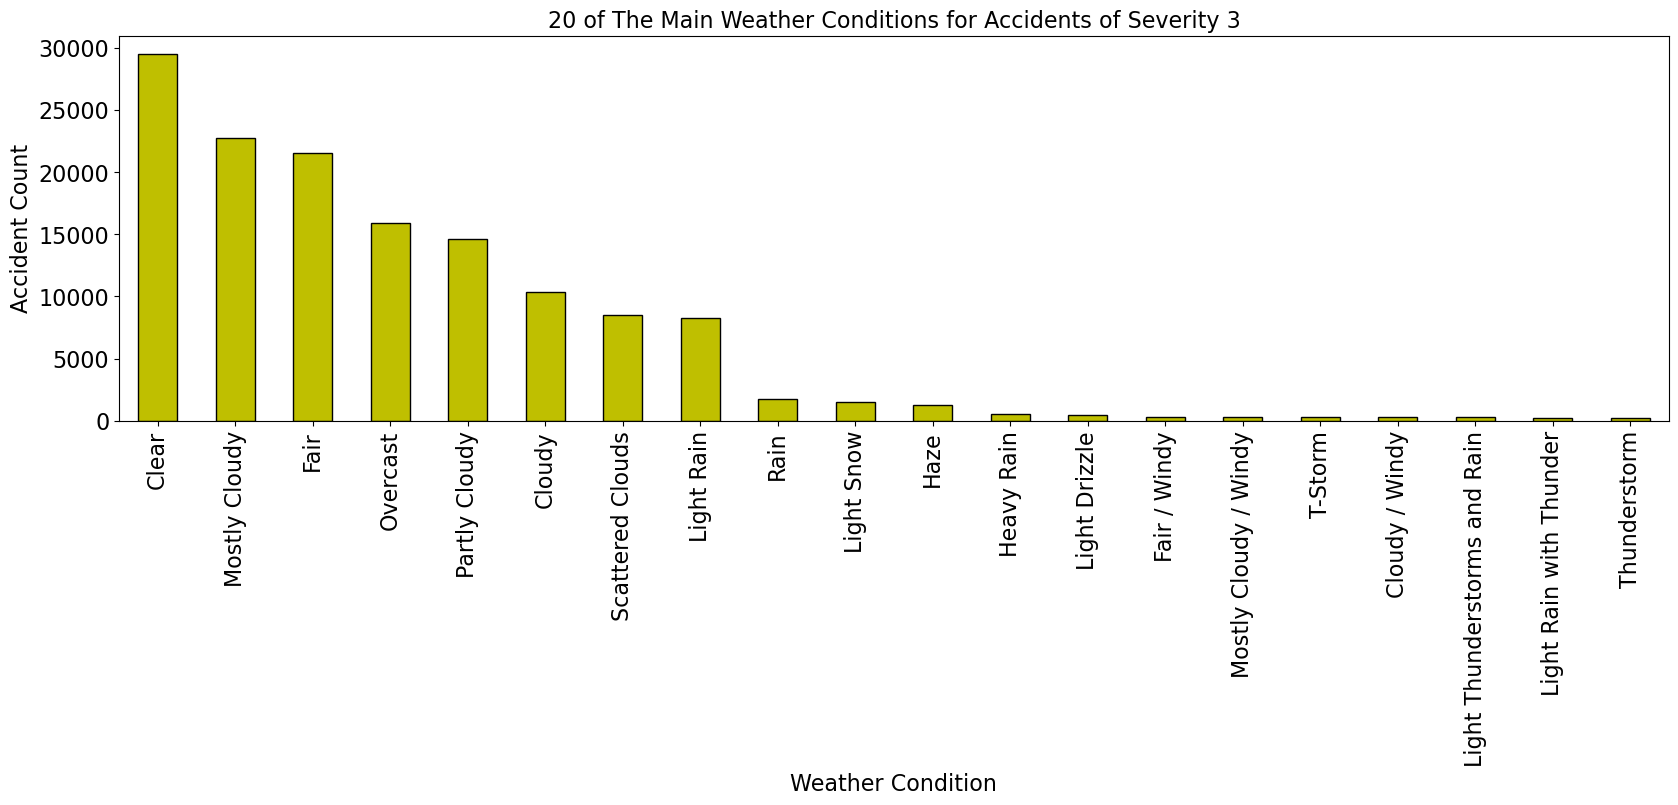

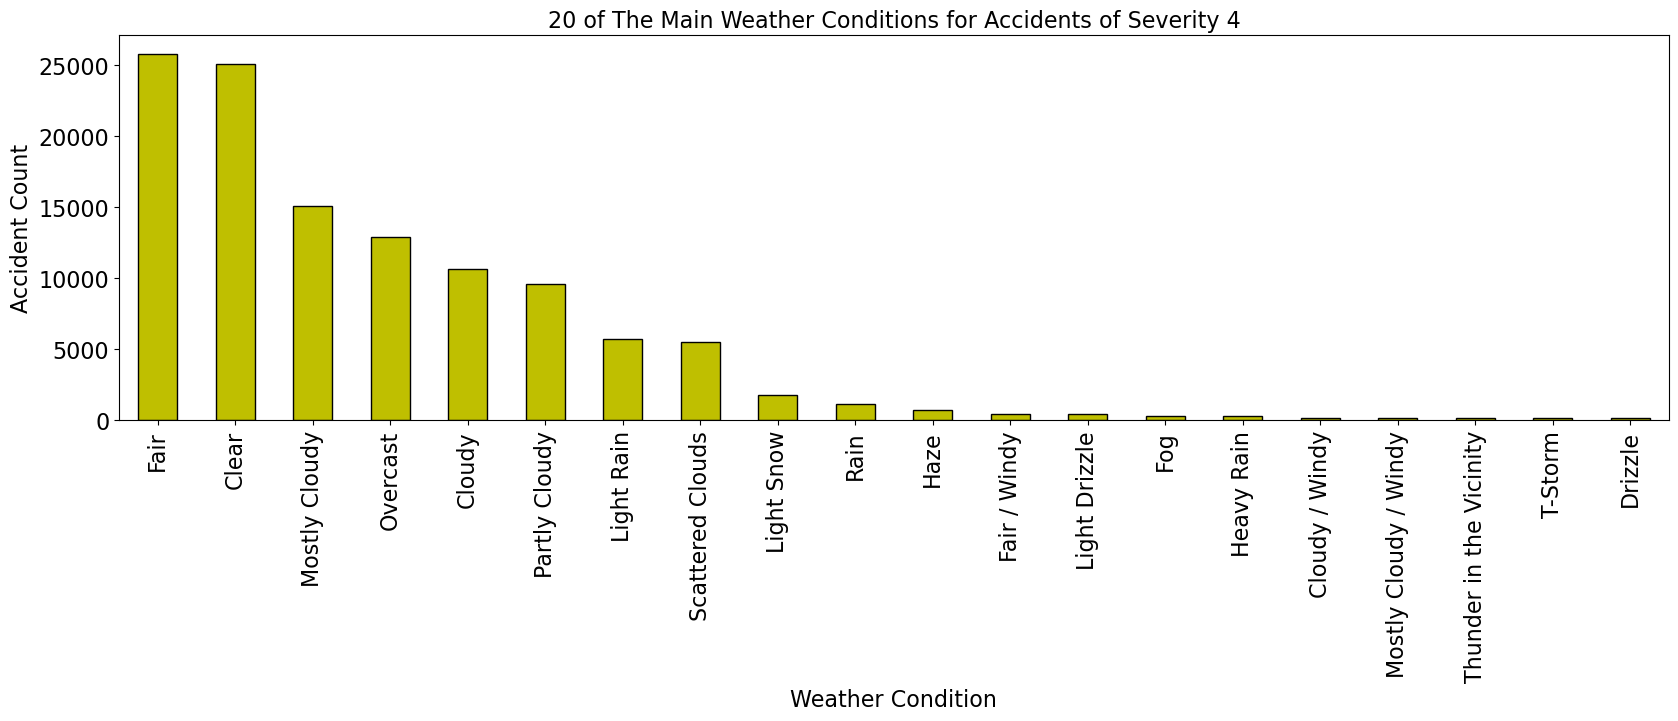

In [18]:
for x in np.arange(1,5):
    plt.subplots(figsize=(20,5))
    data.loc[data["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

<Figure size 1000x500 with 0 Axes>

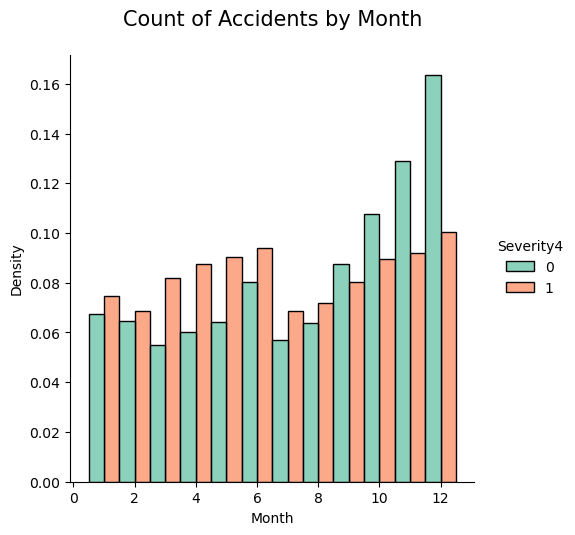

In [19]:
plt.figure(figsize=(10,5))
data['Severity4'] = 0
data.loc[data['Severity'] == 4, 'Severity4'] = 1
sns.displot(x='Month',hue='Severity4',data=data ,palette="Set2",multiple='dodge',discrete=True,common_norm=False,stat="density")
plt.title('Count of Accidents by Month', size=15, y=1.05)
plt.show()
# data.drop('Severity4',inplace=True)

<Figure size 500x500 with 0 Axes>

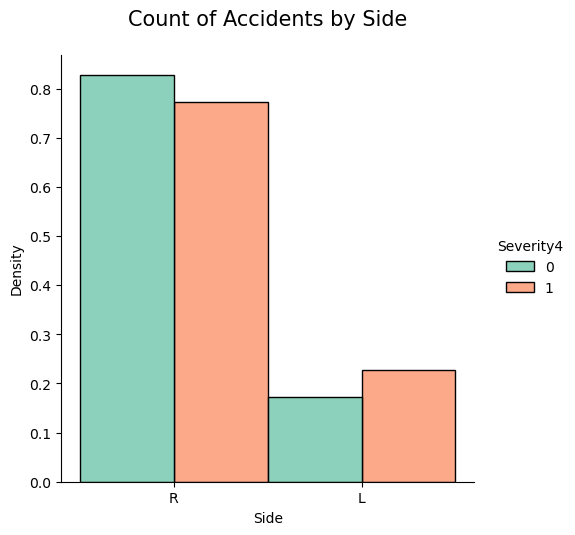

In [20]:
plt.figure(figsize=(5,5))
chart = sns.displot(x='Side', hue='Severity4', data=data ,palette="Set2",multiple='dodge',discrete=True,common_norm=False,stat="density")
plt.title("Count of Accidents by Side", size=15, y=1.05)
plt.show()

C:\Users\Houman\AppData\Local\Temp\ipykernel_24308\2455969261.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x='Month',data=data[data['Severity']==4] ,palette="Set2",multiple='dodge',discrete=True)


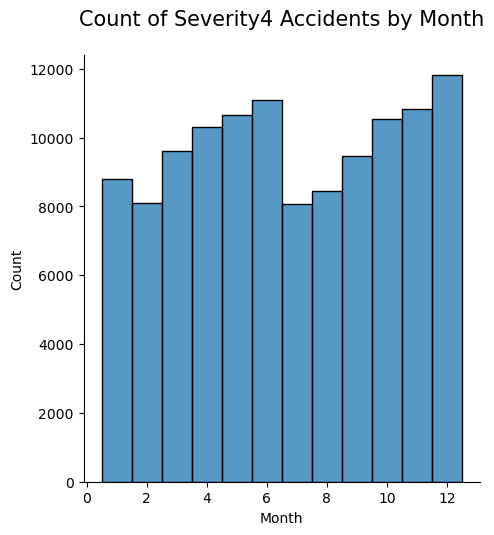

In [21]:
sns.displot(x='Month',data=data[data['Severity']==4] ,palette="Set2",multiple='dodge',discrete=True)
plt.title('Count of Severity4 Accidents by Month', size=15, y=1.05)
plt.show()

C:\Users\Houman\AppData\Local\Temp\ipykernel_24308\797115503.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


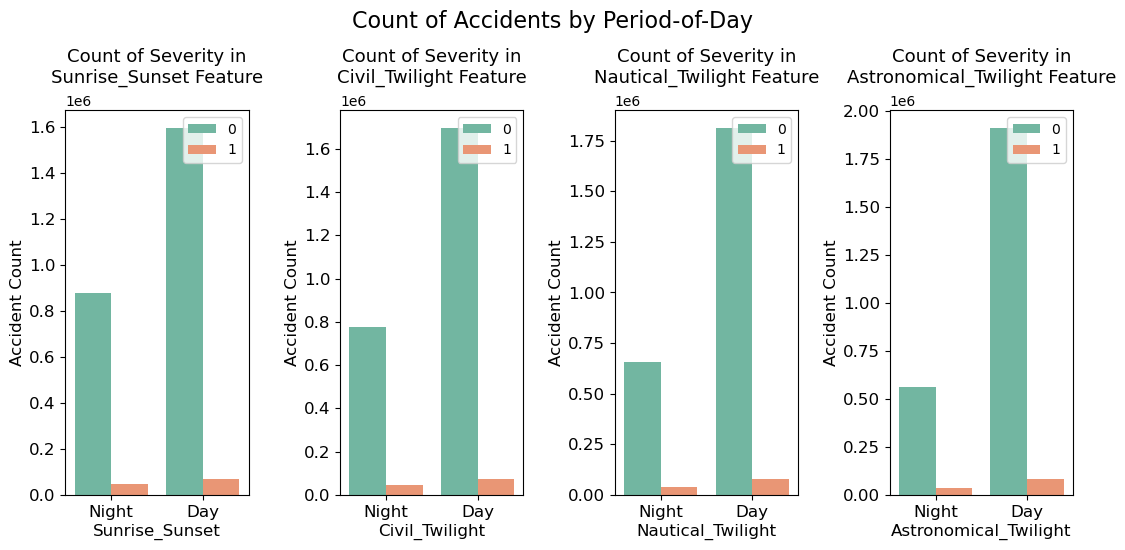

In [22]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=data ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day',y=1.08, fontsize=16)
plt.show()

<Figure size 1500x500 with 0 Axes>

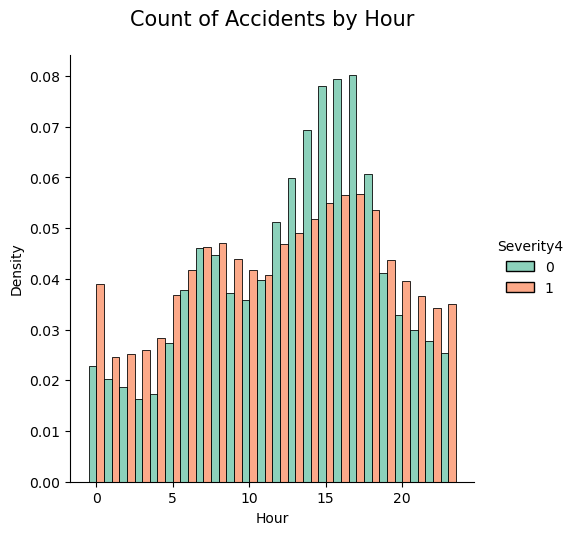

In [23]:
plt.figure(figsize=(15,5))
sns.displot(x='Hour', hue='Severity4', data=data ,palette="Set2",multiple='dodge',discrete=True,common_norm=False,stat="density")
plt.title('Count of Accidents by Hour', size=15, y=1.05)
plt.show()

<Figure size 1500x500 with 0 Axes>

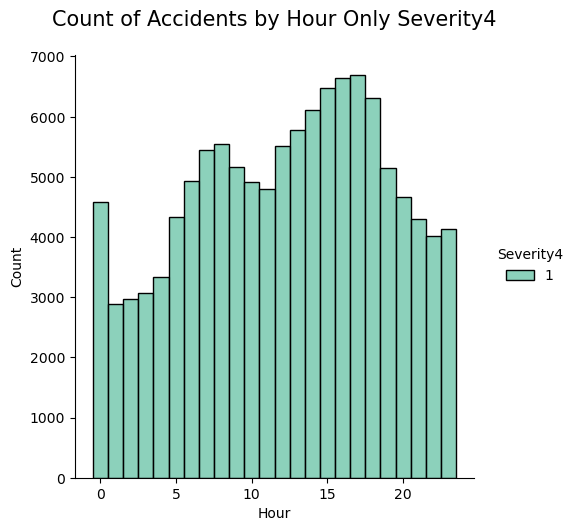

In [24]:
plt.figure(figsize=(15,5))
sns.displot(x='Hour', hue='Severity4', data=data[data['Severity4']==1] ,palette="Set2",multiple='dodge',discrete=True)
plt.title('Count of Accidents by Hour Only Severity4', size=15, y=1.05)
plt.show()

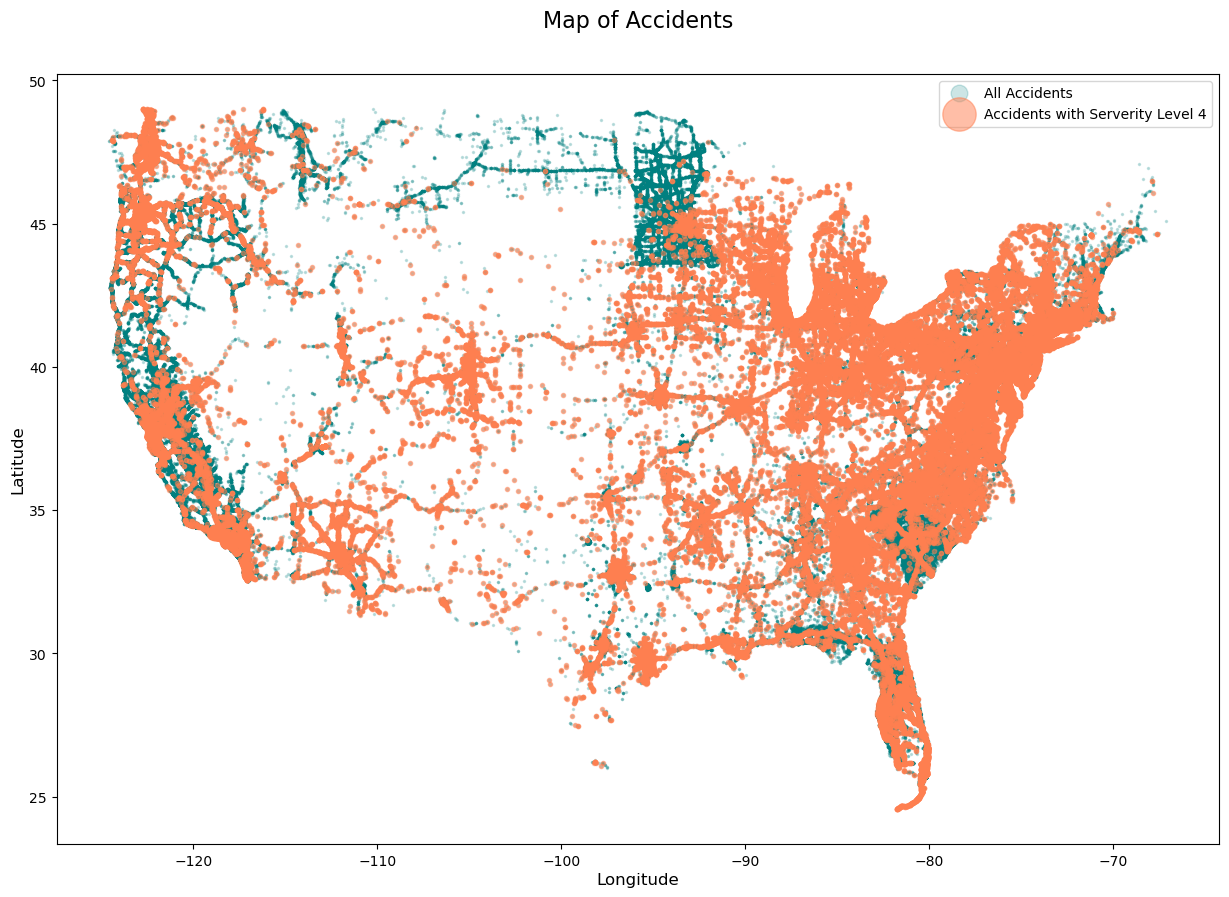

In [25]:
data_4 = data[data['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=data, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=data_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

# Saving the files for ML

In [26]:
data.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Precipitation_NA', 'Year', 'Month', 'Day', 'Hour', 'DayofWeek',
       'Time_Diff', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow',
       'Heavy_Snow', 'Fog', 'Severity4'],
      dtype='object')

## Last Pre_proccess

In [27]:
from sklearn import preprocessing
data.drop('Weather_Timestamp',axis=1,inplace=True)
data.drop('Year',axis=1,inplace=True)


data.drop('Severity4',axis=1,inplace=True)

In [28]:
csv_file_path = 'Us_Accident_Final.csv'

# Save the DataFrame to a CSV file
data.to_csv(csv_file_path, index=False)

print(f'DataFrame saved to CSV file "{csv_file_path}" successfully.')

DataFrame saved to CSV file "Us_Accident_Final.csv" successfully.
